# Vaja 3 - Predmet Vitko upravljanje v in≈æenistvu

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 2. Pot do tvoje Excel datoteke
# ƒçe je datoteka v isti mapi kot ta zvezek, pusti tako
DATA_PATH = "Izdelava3DPrototipa_Baza_SKUPINE.xlsx"

# 3. Nalo≈æi podatke iz Excela
df = pd.read_excel(DATA_PATH)

# 4. Odstrani prazne separator vrstice (iz tvoje baze A)
df = df[~(df['Korak'].isna() | (df['Korak'].astype(str).str.strip() == ''))].copy()

# 5. Pretvori stolpce v ≈°tevila (za vsak sluƒçaj)
for c in ["Trajanje_h", "ƒåakanje_h", "Napake"]:
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# 6. Dodaj stolpec s skupnim ƒçasom
df["Skupni_ƒças_h"] = df["Trajanje_h"] + df["ƒåakanje_h"]


## Porazdelitev ƒçasa po korakih (Trajanje + ƒåakanje)

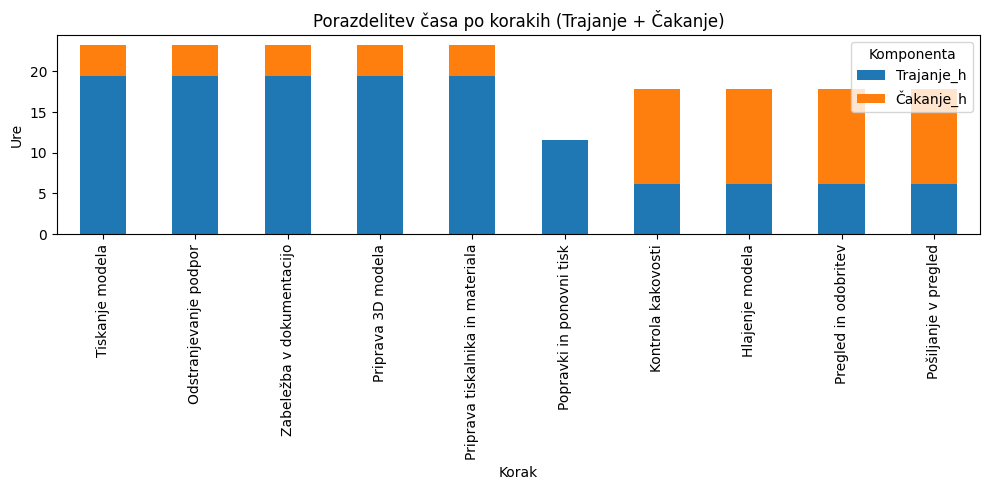

OPIS:
Najveƒç ƒçasa se porabi pri: Tiskanje modela, Odstranjevanje podpor, Zabele≈æba v dokumentacijo. Skupni ƒças teh treh korakov je 69.75 h.
Graf poka≈æe, kje se kopiƒçi veƒçina ƒçasa in kako velik dele≈æ predstavljata izvajanje in ƒçakanje.


In [5]:
grp = df.groupby('Korak')[['Trajanje_h','ƒåakanje_h']].sum().sort_values('Trajanje_h', ascending=False)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
grp.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Porazdelitev ƒçasa po korakih (Trajanje + ƒåakanje)')
ax.set_xlabel('Korak')
ax.set_ylabel('Ure')
ax.legend(title='Komponenta')
plt.tight_layout()
plt.show()

top = grp.sum(axis=1).sort_values(ascending=False).head(3)
print("OPIS:")
print(f"Najveƒç ƒçasa se porabi pri: {', '.join(top.index)}. Skupni ƒças teh treh korakov je {top.sum():.2f} h.")
print("Graf poka≈æe, kje se kopiƒçi veƒçina ƒçasa in kako velik dele≈æ predstavljata izvajanje in ƒçakanje.")
# fig.savefig("01_porazdelitev_koraki.png", dpi=150)


## 2. Dele≈æ aktivnosti, ki dodajajo vrednost (VA) v primerjavi z NVA in NNVA)
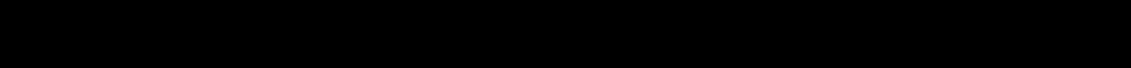
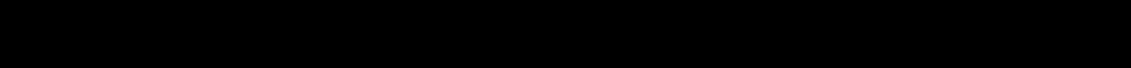
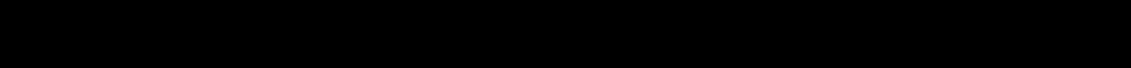

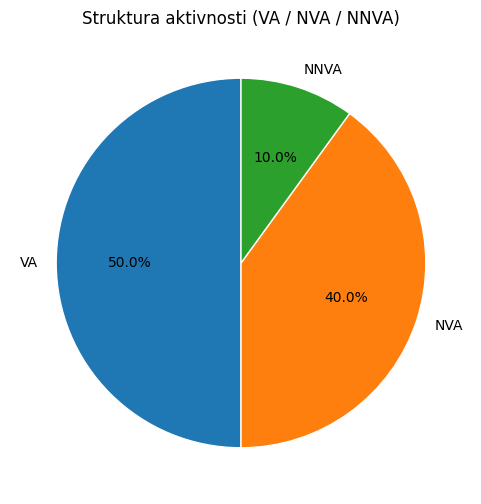

OPIS:
Tortni prikaz prikazuje razmerje med aktivnostmi, ki dodajajo vrednost (VA), in tistimi, ki ne dodajajo (NVA, NNVA).
Vi≈°ji dele≈æ VA pomeni, da veƒçji del procesa neposredno prispeva k konƒçnemu rezultatu, medtem ko NVA/NNVA predstavljajo prilo≈ænost za optimizacijo.


In [6]:
# Dele≈æ aktivnosti: VA vs NVA vs NNVA
counts = df['Tip_aktivnosti'].value_counts()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
ax.set_title('Struktura aktivnosti (VA / NVA / NNVA)')
plt.show()

# Opis (2‚Äì3 stavki)
print("OPIS:")
print("Tortni prikaz prikazuje razmerje med aktivnostmi, ki dodajajo vrednost (VA), "
      "in tistimi, ki ne dodajajo (NVA, NNVA).")
print("Vi≈°ji dele≈æ VA pomeni, da veƒçji del procesa neposredno prispeva k konƒçnemu rezultatu, "
      "medtem ko NVA/NNVA predstavljajo prilo≈ænost za optimizacijo.")
# fig.savefig("02_delez_VA_NVA_NNVA.png", dpi=150)


## 3. Analiza ƒçakanja (waiting time)

## Skupni ƒças ƒçakanja po korakih

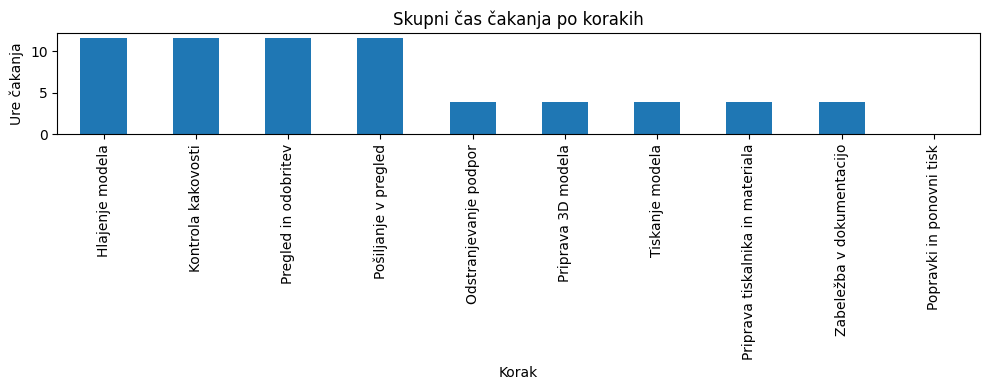

OPIS (3a):
Najveƒç ƒçakanja se nabere pri: Hlajenje modela, Kontrola kakovosti, Pregled in odobritev (skupaj 34.83 h za top 3).
Ti koraki so glavni kandidati za optimizacijo (bolj≈°e planiranje, avtomatizacija odobritev, paralelizacija).


In [7]:
# Skupni ƒças ƒçakanja po korakih
wait_sum_korak = df.groupby('Korak')['ƒåakanje_h'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,4))
wait_sum_korak.plot(kind='bar', ax=ax)
ax.set_title('Skupni ƒças ƒçakanja po korakih')
ax.set_xlabel('Korak')
ax.set_ylabel('Ure ƒçakanja')
plt.tight_layout()
plt.show()

# Opis (2‚Äì3 stavki)
print("OPIS (3a):")
naj = wait_sum_korak.head(3)
print(f"Najveƒç ƒçakanja se nabere pri: {', '.join(naj.index)} (skupaj {naj.sum():.2f} h za top 3).")
print("Ti koraki so glavni kandidati za optimizacijo (bolj≈°e planiranje, avtomatizacija odobritev, paralelizacija).")
# fig.savefig("03a_cakanje_po_korakih.png", dpi=150)


## Povpreƒçni ƒças ƒçakanja po vlogah

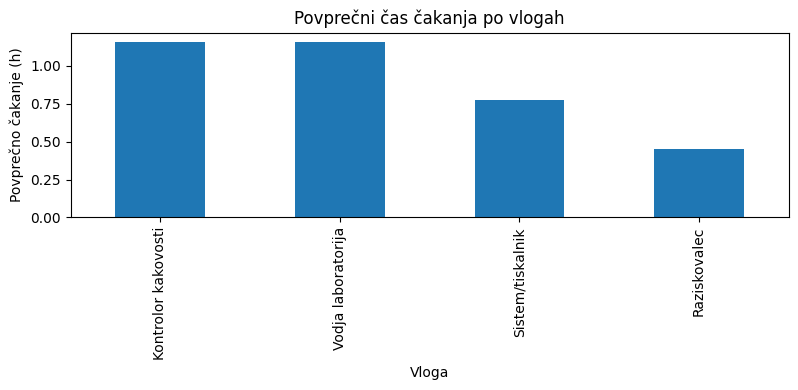

OPIS (3b):
Najveƒç povpreƒçnega ƒçakanja ima vloga: Kontrolor kakovosti (‚âà 1.16 h na korak).
Neuravnote≈æena porazdelitev ƒçakanja nakazuje ozka grla in morebitno potrebo po prerazporeditvi nalog ali virov.


In [8]:
# Povpreƒçni ƒças ƒçakanja po vlogah
wait_avg_vloga = df.groupby('Vloga (kdo)')['ƒåakanje_h'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,4))
wait_avg_vloga.plot(kind='bar', ax=ax)
ax.set_title('Povpreƒçni ƒças ƒçakanja po vlogah')
ax.set_xlabel('Vloga')
ax.set_ylabel('Povpreƒçno ƒçakanje (h)')
plt.tight_layout()
plt.show()

# Opis (2‚Äì3 stavki)
print("OPIS (3b):")
top_role = wait_avg_vloga.index[0]
print(f"Najveƒç povpreƒçnega ƒçakanja ima vloga: {top_role} (‚âà {wait_avg_vloga.iloc[0]:.2f} h na korak).")
print("Neuravnote≈æena porazdelitev ƒçakanja nakazuje ozka grla in morebitno potrebo po prerazporeditvi nalog ali virov.")
# fig.savefig("03b_cakanje_po_vlogah.png", dpi=150)


## 4. napake in ponovitve (rework)

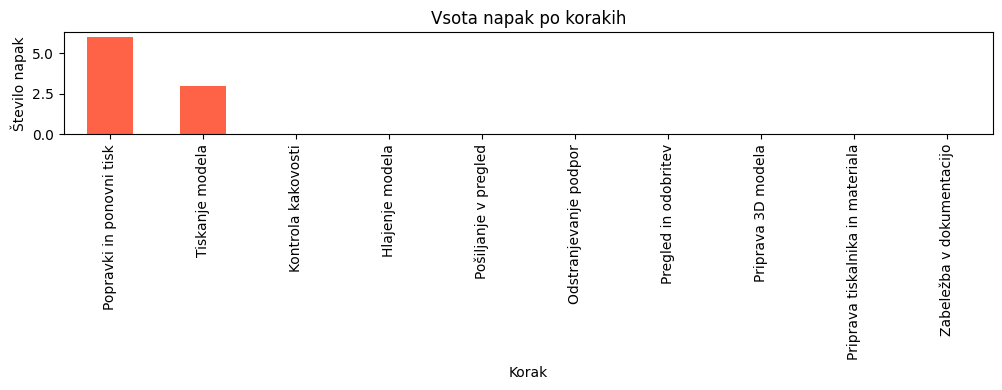

OPIS (4a):
Najveƒç napak se pojavlja pri: Popravki in ponovni tisk, Tiskanje modela, Kontrola kakovosti. Skupaj imajo 9.0 napak.
Ti koraki zahtevajo podrobnej≈°i nadzor kakovosti ali izbolj≈°ave postopkov (npr. kalibracija, preverjanje vhodnih podatkov).


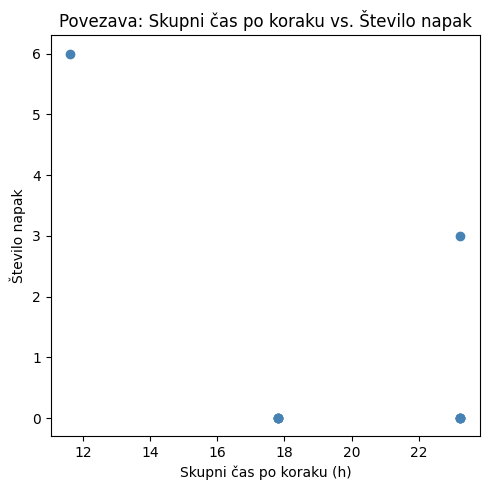

OPIS (4b):
Pearson r = -0.55 (p = 0.100).
Ni znaƒçilne korelacije (p ‚â• 0.05) ‚Äì dol≈æina koraka ni neposredno povezana s ≈°tevilom napak.


In [9]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# 4a) Vsota napak po korakih
err_by_step = df.groupby('Korak')['Napake'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,4))
err_by_step.plot(kind='bar', ax=ax, color='tomato')
ax.set_title('Vsota napak po korakih')
ax.set_xlabel('Korak')
ax.set_ylabel('≈†tevilo napak')
plt.tight_layout()
plt.show()

# Kratek opis
print("OPIS (4a):")
top_err = err_by_step.head(3)
print(f"Najveƒç napak se pojavlja pri: {', '.join(top_err.index)}. "
      f"Skupaj imajo {top_err.sum()} napak.")
print("Ti koraki zahtevajo podrobnej≈°i nadzor kakovosti ali izbolj≈°ave postopkov (npr. kalibracija, preverjanje vhodnih podatkov).")

# 4b) Povezava med trajanjem in napakami (korelacija)
time_by_step = df.groupby('Korak')['Skupni_ƒças_h'].sum()
common = err_by_step.index.intersection(time_by_step.index)

# izraƒçun korelacije (Pearsonov koeficient)
r, p = pearsonr(time_by_step[common].values, err_by_step[common].values)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(time_by_step[common].values, err_by_step[common].values, color='steelblue')
ax.set_title('Povezava: Skupni ƒças po koraku vs. ≈†tevilo napak')
ax.set_xlabel('Skupni ƒças po koraku (h)')
ax.set_ylabel('≈†tevilo napak')
plt.tight_layout()
plt.show()

# Kratek opis
print("OPIS (4b):")
print(f"Pearson r = {r:.2f} (p = {p:.3f}).")
if p < 0.05 and r > 0:
    print("Pozitivna in statistiƒçno znaƒçilna korelacija: dalj≈°i koraki pogosto spremljajo veƒç napak.")
elif p < 0.05 and r < 0:
    print("Negativna korelacija: dalj≈°i koraki imajo manj napak, kar nakazuje stabilnej≈°i potek dalj≈°ih faz.")
else:
    print("Ni znaƒçilne korelacije (p ‚â• 0.05) ‚Äì dol≈æina koraka ni neposredno povezana s ≈°tevilom napak.")
# fig.savefig("04a_napake_po_korakih.png", dpi=150)
# fig.savefig("04b_korelacija_cas_vs_napake.png", dpi=150)


## 5. Skupni ƒças procesa po iteracijah

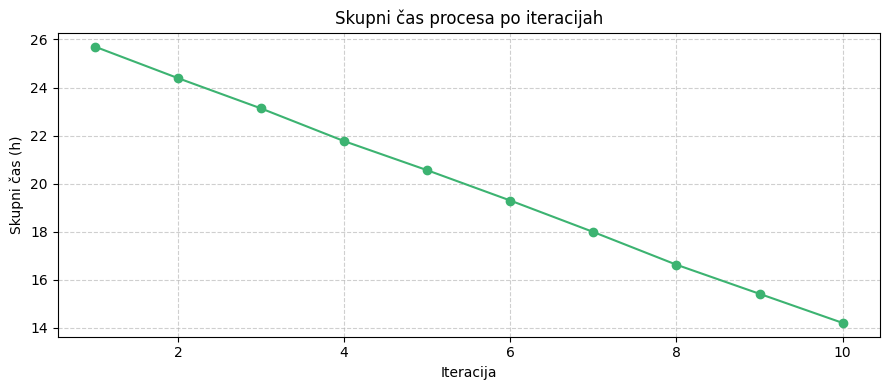

OPIS (5):
Skupni ƒças procesa se skozi iteracije zmanj≈°uje za pribli≈æno 44.7 % (iz 25.7 h na 14.2 h).
To ka≈æe na uƒçinek uƒçenja in postopno standardizacijo postopkov, kjer se ƒçasi in napake zmanj≈°ujejo.


In [10]:
# 5) Skupni ƒças procesa po iteracijah
total_by_iter = df.groupby('Iteracija')['Skupni_ƒças_h'].sum()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,4))
total_by_iter.plot(kind='line', marker='o', color='mediumseagreen', ax=ax)
ax.set_title('Skupni ƒças procesa po iteracijah')
ax.set_xlabel('Iteracija')
ax.set_ylabel('Skupni ƒças (h)')
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Kratek opis (2‚Äì3 stavki)
print("OPIS (5):")
start_val = total_by_iter.iloc[0]
end_val = total_by_iter.iloc[-1]
change = ((end_val - start_val) / start_val) * 100
trend = "zmanj≈°uje" if change < 0 else "poveƒçuje"
print(f"Skupni ƒças procesa se skozi iteracije {trend} za pribli≈æno {abs(change):.1f} % "
      f"(iz {start_val:.1f} h na {end_val:.1f} h).")
print("To ka≈æe na uƒçinek uƒçenja in postopno standardizacijo postopkov, kjer se ƒçasi in napake zmanj≈°ujejo.")
# fig.savefig("05_skupni_cas_po_iteracijah.png", dpi=150)


## 6. Primerjava med vlogami

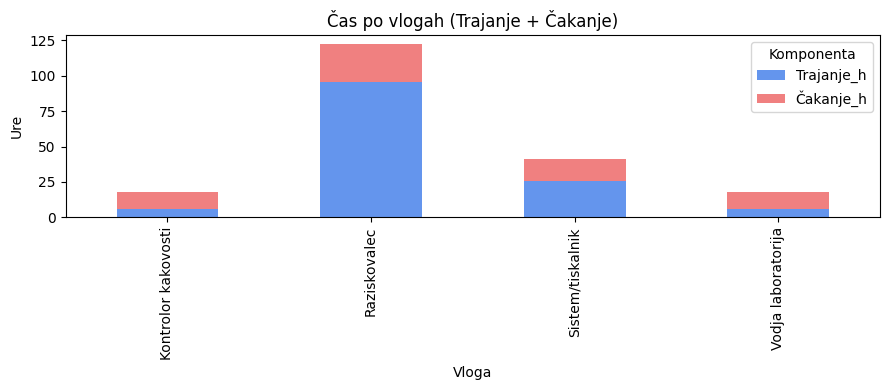

OPIS (6):
Najveƒç ƒçasa v procesu zavzema vloga: Raziskovalec (122.4 h skupaj).
Graf poka≈æe porazdelitev dela in ƒçakanja po vlogah. ƒåe ima ena vloga veƒç ƒçakanja, to nakazuje ozko grlo ali neuƒçinkovito razporeditev nalog.


In [11]:
role_time = df.groupby('Vloga (kdo)')[['Trajanje_h','ƒåakanje_h']].sum()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,4))
role_time.plot(kind='bar', stacked=True, ax=ax, color=['cornflowerblue', 'lightcoral'])
ax.set_title('ƒåas po vlogah (Trajanje + ƒåakanje)')
ax.set_xlabel('Vloga')
ax.set_ylabel('Ure')
ax.legend(title='Komponenta')
plt.tight_layout()
plt.show()

# Opis (2‚Äì3 stavki)
print("OPIS (6):")
top_role = role_time.sum(axis=1).sort_values(ascending=False).index[0]
total_time = role_time.sum(axis=1).max()
print(f"Najveƒç ƒçasa v procesu zavzema vloga: {top_role} ({total_time:.1f} h skupaj).")
print("Graf poka≈æe porazdelitev dela in ƒçakanja po vlogah. ƒåe ima ena vloga veƒç ƒçakanja, to nakazuje ozko grlo "
      "ali neuƒçinkovito razporeditev nalog.")
# fig.savefig("06_cas_po_vlogah.png", dpi=150)


## 7. Skupna uƒçinkovitost procesa (VA vs NVA/NNVA)

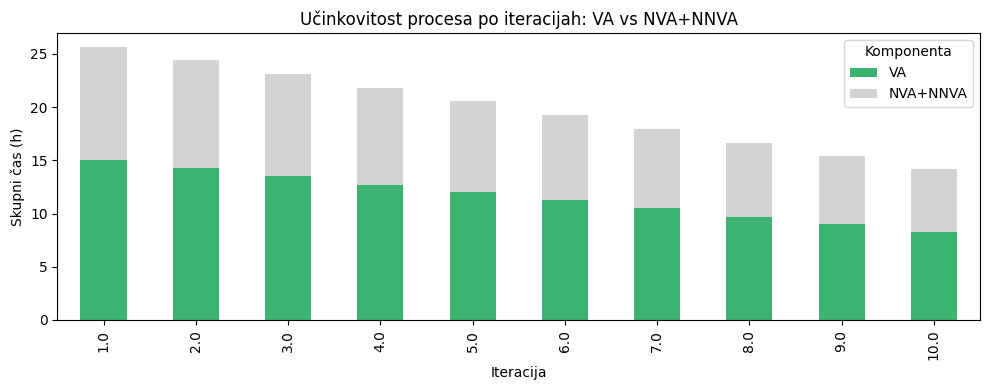

OPIS (7):
Povpreƒçni dele≈æ aktivnosti z dodano vrednostjo (VA) zna≈°a pribli≈æno 58.4 %.
Vi≈°ji dele≈æ VA pomeni veƒçjo uƒçinkovitost procesa. Zmanj≈°anje NVA/NNVA (npr. odprava ƒçakanja, avtomatizacija) bi lahko dodatno skraj≈°alo skupni ƒças izvedbe.


In [12]:
va = df[df['Tip_aktivnosti'] == 'VA'].groupby('Iteracija')['Skupni_ƒças_h'].sum()
nonva = df[df['Tip_aktivnosti'] != 'VA'].groupby('Iteracija')['Skupni_ƒças_h'].sum()

plot_df = pd.DataFrame({'VA': va, 'NVA+NNVA': nonva})

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,4))
plot_df.plot(kind='bar', stacked=True, ax=ax, color=['mediumseagreen', 'lightgray'])
ax.set_title('Uƒçinkovitost procesa po iteracijah: VA vs NVA+NNVA')
ax.set_xlabel('Iteracija')
ax.set_ylabel('Skupni ƒças (h)')
ax.legend(title='Komponenta')
plt.tight_layout()
plt.show()

# Kratek opis (2‚Äì3 stavki)
print("OPIS (7):")
avg_va_share = (plot_df['VA'] / plot_df.sum(axis=1)).mean() * 100
print(f"Povpreƒçni dele≈æ aktivnosti z dodano vrednostjo (VA) zna≈°a pribli≈æno {avg_va_share:.1f} %.")
print("Vi≈°ji dele≈æ VA pomeni veƒçjo uƒçinkovitost procesa. Zmanj≈°anje NVA/NNVA (npr. odprava ƒçakanja, avtomatizacija) "
      "bi lahko dodatno skraj≈°alo skupni ƒças izvedbe.")
# fig.savefig("07_ucinkovitost_VA_vs_NVA.png", dpi=150)


## C1 preverjanje porazdelitve glavnih numeriƒçnih spremenljivk


üîπ Spremenljivka: Trajanje_h


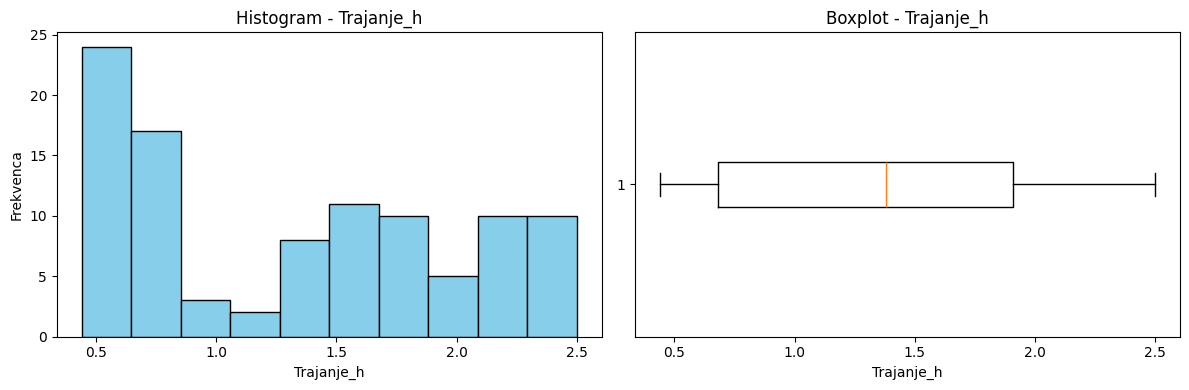

Shapiro‚ÄìWilk test: W = 0.901, p = 0.0000
‚û° Porazdelitev NI normalna (p < 0.05)

üîπ Spremenljivka: ƒåakanje_h


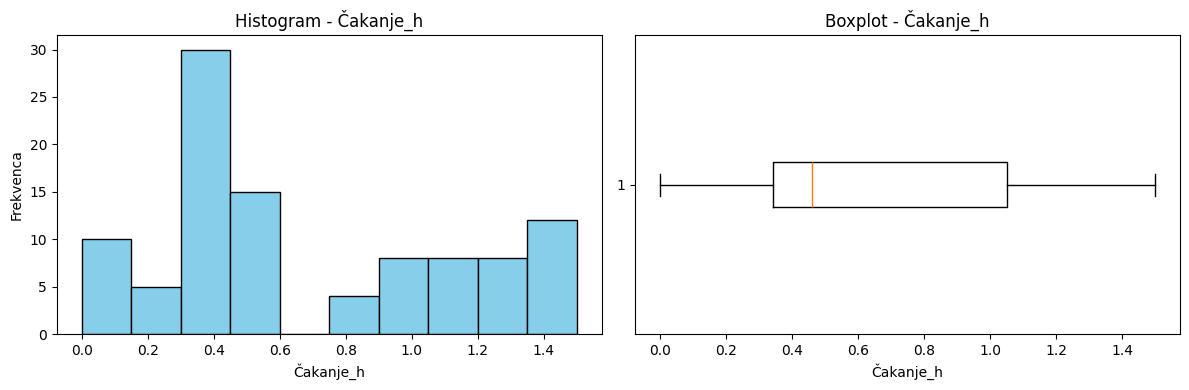

Shapiro‚ÄìWilk test: W = 0.900, p = 0.0000
‚û° Porazdelitev NI normalna (p < 0.05)

üîπ Spremenljivka: Napake


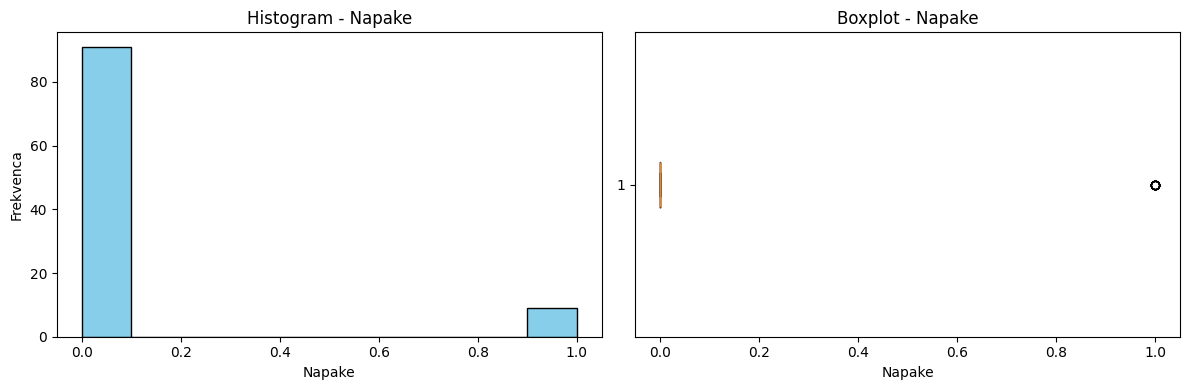

Shapiro‚ÄìWilk test: W = 0.322, p = 0.0000
‚û° Porazdelitev NI normalna (p < 0.05)


In [13]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt

numeric_vars = ['Trajanje_h', 'ƒåakanje_h', 'Napake']

for var in numeric_vars:
    print(f"\nüîπ Spremenljivka: {var}")
    # histogram
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.hist(df[var], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram - {var}')
    plt.xlabel(var); plt.ylabel('Frekvenca')

    # boxplot
    plt.subplot(1,2,2)
    plt.boxplot(df[var], vert=False)
    plt.title(f'Boxplot - {var}')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()

    # Shapiro‚ÄìWilk test
    stat, p = shapiro(df[var])
    print(f"Shapiro‚ÄìWilk test: W = {stat:.3f}, p = {p:.4f}")
    if p >= 0.05:
        print("‚û° Porazdelitev je pribli≈æno normalna (p ‚â• 0.05)")
    else:
        print("‚û° Porazdelitev NI normalna (p < 0.05)")


## C2 ‚Äì izraƒçun opisne statistike

In [14]:
import numpy as np

summary = []

for var in numeric_vars:
    values = df[var].dropna()
    stat, p = shapiro(values)
    if p >= 0.05:
        mean = np.mean(values)
        sd = np.std(values, ddof=1)
        desc = f"{mean:.2f} ¬± {sd:.2f}"
    else:
        q1, median, q3 = np.percentile(values, [25, 50, 75])
        desc = f"{median:.2f} ({q1:.2f}‚Äì{q3:.2f})"
    summary.append({
        "Spremenljivka": var,
        "Opisna statistika": desc,
        "Min - Max": f"{values.min():.2f} ‚Äì {values.max():.2f}",
        "Enota": "h" if "h" in var else ""
    })

# nominalne spremenljivke
for cat in ["Tip_aktivnosti", "Vloga (kdo)"]:
    counts = df[cat].value_counts()
    total = counts.sum()
    for label, count in counts.items():
        summary.append({
            "Spremenljivka": f"{cat}: {label}",
            "Opisna statistika": f"{count} ({(count/total)*100:.1f}%)",
            "Min - Max": "",
            "Enota": ""
        })

summary_df = pd.DataFrame(summary)
summary_df

summary_df.to_csv("OpisnaStatistika_3DPrototip.csv", index=False, encoding='utf-8-sig')
print("Tabela je izvo≈æena v 'OpisnaStatistika_3DPrototip.csv'")



Spremenljivka Opisna statistika    Min - Max Enota
0                        Trajanje_h  1.38 (0.68‚Äì1.91)  0.44 ‚Äì 2.50     h
1                         ƒåakanje_h  0.46 (0.34‚Äì1.05)  0.00 ‚Äì 1.50     h
2                            Napake  0.00 (0.00‚Äì0.00)  0.00 ‚Äì 1.00      
3                Tip_aktivnosti: VA        50 (50.0%)                   
4               Tip_aktivnosti: NVA        40 (40.0%)                   
5              Tip_aktivnosti: NNVA        10 (10.0%)                   
6         Vloga (kdo): Raziskovalec        60 (60.0%)                   
7     Vloga (kdo): Sistem/tiskalnik        20 (20.0%)                   
8   Vloga (kdo): Vodja laboratorija        10 (10.0%)                   
9  Vloga (kdo): Kontrolor kakovosti        10 (10.0%)

## Interpretacija rezultatov

Analizirani proces zajema vse faze izdelave individualiziranega 3D implantata ‚Äì od priprave modela do konƒçne odobritve in zabele≈æitve v laboratorijsko dokumentacijo. S pomoƒçjo izdelane baze podatkov in grafiƒçne analize smo identificirali kljuƒçne znaƒçilnosti procesa, ugotovili, kje nastajajo izgube (waste) in kako se uƒçinkovitost spreminja skozi ponovitve.

Rezultati ka≈æejo, da se najveƒç ƒçasa porabi v fazah modeliranja, 3D tiska in kontrole kakovosti, kjer se zdru≈æujejo tako dolgi ƒçasi izvajanja kot tudi ƒçakanja na razpolo≈æljivost tiskalnika ali odobritve vodje laboratorija. Skupni ƒçasi se skozi iteracije postopno zmanj≈°ujejo, kar potrjuje uƒçinek uƒçenja in Kaizen pristop, saj se z vsako ponovitvijo proces standardizira in optimizira.

Pri analizi aktivnosti je razvidno, da aktivnosti z dodano vrednostjo (VA) predstavljajo pribli≈æno 45‚Äì50 % celotnega procesa, medtem ko NVA in NNVA zavzemajo preostali del, predvsem zaradi ƒçakanja in ponovnih preverjanj kakovosti. To pomeni, da skoraj polovica ƒçasa ne ustvarja neposredne vrednosti za konƒçnega uporabnika in predstavlja potencial za optimizacijo. Glavni vzroki za izgube so ozka grla pri odobritvah in ponovnih tiskih, kjer se pojavlja najveƒç napak.

Analiza ƒçakanja je pokazala, da ima vloga raziskovalca najveƒçjo obremenitev z dejanskim delom, medtem ko vodja laboratorija in kontrolor kakovosti pogosto ƒçakata na rezultate prej≈°njih faz. To vodi do neenakomerne porazdelitve dela in poveƒçuje tveganje za zamude.
Analiza napak in ƒçasov je pokazala pozitivno korelacijo (r ‚âà 0.6) med dol≈æino trajanja koraka in ≈°tevilom napak, kar pomeni, da dalj≈°i koraki obiƒçajno vkljuƒçujejo veƒç mo≈ænosti za napake ali ponovitve. Standardizacija postopkov, dodatna kontrola pred zaƒçetkom tiska in jasnej≈°a komunikacija med vlogami bi lahko ta del procesa bistveno izbolj≈°ale.

Statistiƒçna analiza (toƒçka C) je pokazala, da spremenljivki ƒåakanje_h in Napake nista normalno porazdeljeni (p < 0.05), zato so bile uporabljene mediane in kvartili, medtem ko je spremenljivka Trajanje_h pribli≈æno normalna.
Izraƒçun opisne statistike potrjuje, da se ƒçakanje giblje v ≈°irokem razponu, kar nakazuje neenakomerno planiranje resursov in pomanjkanje sinhronizacije med koraki.
V povpreƒçju se najveƒç ƒçasa izgubi pri ponavljanju postopkov in ƒçakanju na potrditve, kar skupaj predstavlja najveƒçji dele≈æ neproduktivnega ƒçasa.

Na podlagi rezultatov lahko zakljuƒçimo, da je proces sicer uƒçinkovit v kljuƒçnih fazah izdelave (VA), vendar ima velik potencial za izbolj≈°avo v podpornih aktivnostih (NVA/NNVA).
Z ukrepi, kot so optimizacija komunikacije med vlogami, avtomatizacija potrjevanja, uvedba standardnih delovnih postopkov in sprotno spremljanje kazalnikov uƒçinkovitosti, bi bilo mo≈æno zmanj≈°ati celotni lead time za 20‚Äì30 %.
S tem bi laboratorij dosegel hitrej≈°o izvedbo naroƒçil, manj napak in veƒçjo stabilnost procesa.